In [28]:
import numpy as np
class AdlaineGd():
    def __init__(self, eta = 0.01, n_ter = 50, shuffle = True, random_State = None):
        self.w_initializ = False
        self.eta = eta
        self.n_ter = n_ter
        self.shuffle = shuffle
        self.random_State = random_State

    def fit(self, X, y):
        self._initialize_weight(X.shape[1])
        self._losses = []
        for i in range(self.n_ter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi, target))
            Avg_losses = np.mean(losses)
            self._losses.append(Avg_losses)
        return self

    def partial_fit(self,X,y):
        if self.w_initializ is False:
            self._initialize_weight(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y)) # shuffling the data from 0 to y-1
        return X[r], y[r]
    
    def _initialize_weight(self, m):
        self.rgen = np.random.RandomState(self.random_State)
        self.bias = 0.0
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size=m)
        self.w_initializ = True

    def _update_weights(self,xi,target):
        output = self.net_input(xi)

        errors = (target - output)

        self.w_ += self.eta * 2.0 * xi * (errors)
        self.bias += self.eta * 2.0 * errors
        loss = errors ** 2
        return loss
    
    def net_input(self,X):
        return np.dot(X, self.w_) + self.bias
    
    def prediction(self, X):
        return np.where(self.net_input(X) > 0.5,1,0)


        
    

    
                

            


    

In [4]:
import os
import pandas as pd

s = "https://raw.githubusercontent.com/Wizard-hash2/machine-learning-book/refs/heads/main/ch02/iris.data"
df = pd.read_csv(s)

print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


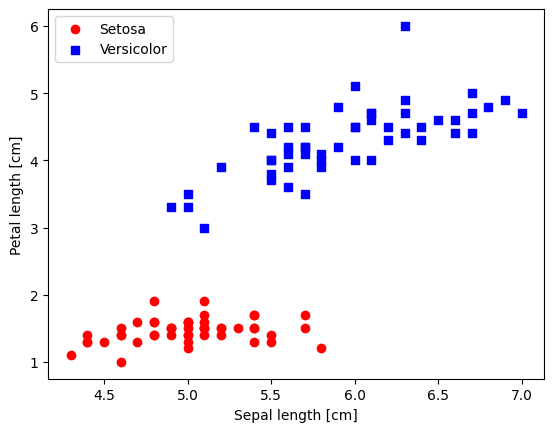

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:49, 0], X[:49, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[49:100, 0], X[49:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [30]:
from matplotlib.colors import ListedColormap

def plot_Decision(x,y,classifire, resolution = 0.02):
    markers = "o","*","s","d"
    colors = ("blue","green","red","yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Creaye a unique color for each value Y



    x_min, x_max =(x[:,0].min()-1,x[:,0].max() + 1) #Padding
    x1_min,x2_max = (x[:,1].min() - 1, x[:1].max() + 1)    
    xx1,xx2 = np.meshgrid(np.arange(x_min,x_max,resolution), np.arange(x1_min,x2_max,resolution)) #Np.arreange(start, stop,increment)
    #meshgrid converts from 1D to ND(2)

    lab = classifire.prediction(np.array([xx1.ravel(),  xx2.ravel()]).T) # ravel flatens the values , T is transpose
    lab = lab.reshape(xx1.shape) # xx1 have same shape as xx2

    plt.contourf(xx1,xx2,lab, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl,1 ], color = colors[idx], marker = markers[idx],edgecolor = "black")





    



C:\Users\Aron\AppData\Local\Temp\ipykernel_25488\1041213457.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


FileNotFoundError: [Errno 2] No such file or directory: 'figures/02_15_1.png'

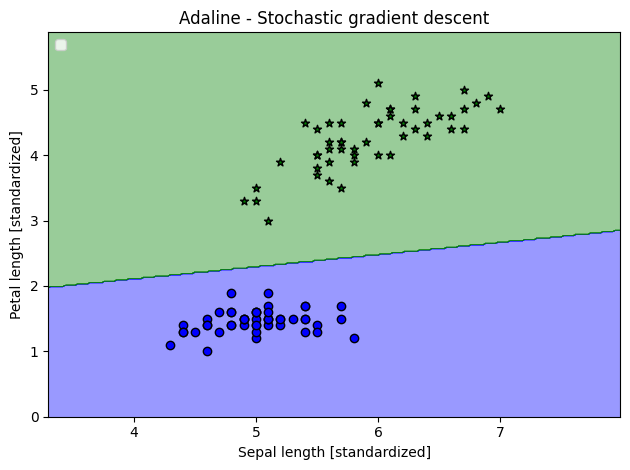

In [31]:
ada_sgd = AdlaineGd(n_ter=15, eta=0.01, random_State=1)
ada_sgd.fit(X, y)

plot_Decision(X, y, classifire=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd._losses) + 1), ada_sgd._losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

plt.savefig('Large_stcha.png', dpi=300)
plt.show()